In [1]:
%ls

'전력 사용량(용도별)_20221130160835.csv'    sample_data/
'전력+사용량(용도별)_20221130161316.xlsx'


In [2]:
import pandas as pd
use_elec_pd = pd.read_csv('전력 사용량(용도별)_20221130160835.csv', header=[0,1,2,3])

In [3]:
columns = set([c[0] for idx, c in enumerate(use_elec_pd.columns) if idx>=3])

In [4]:
total_list = [use_elec_pd['2021. 10']['합계']['소계']['소계'][0] for i in columns]

In [5]:
total_list

[3578614, 3578614, 3578614]

In [6]:
from collections import defaultdict
kind_elect = defaultdict(list)
total = []
index = []
for date in columns:
  index.append(date)
  total.append(use_elec_pd[date]['합계']['소계']['소계'][0])
  sec_columns = use_elec_pd[date]['합계'].columns
  sec_columns = set([value[0] for idx,value in enumerate(sec_columns) if value!='소계'])
  # print(sec_columns)
  
  for kind in sec_columns:
    if kind != '소계':
      kind_elect[kind].append(use_elec_pd[date]['합계'][kind]['소계'][0])

In [7]:
index, total, kind_elect

(['2021. 12', '2021. 11', '2021. 10'],
 [3963700, 3537141, 3578614],
 defaultdict(list,
             {'가정용': [1146475, 1101163, 1106205],
              '공공용': [336239, 270336, 254397],
              '서비스업': [2352648, 2050450, 2107191],
              '산업용': [128338, 115192, 110820]}))

In [8]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


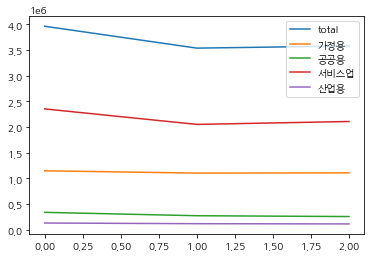

In [11]:
import matplotlib.pyplot as plt
plt.plot(total, label='total')
for key, value in kind_elect.items():
  plt.plot(value, label=key)
plt.legend()
plt.show()